## EDA

- Identify the distribution of data in the dataset
- Understand the structure of the data set
- Perform summary statistics and data visualization
- Identify correlation between features in the data set
- Create a new DataFrame

##### Install and Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load and Preview the Dataset

In [ ]:
file_path = r'D:\New folder (4)\Coursera\DA Capstone\survey_data.csv'

dfo = pd.read_csv(file_path)

dfo.head()    # Display the first five rows

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
df = dfo.copy()

### Exploratory Data Analysis

##### Handling Missing 

Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.

In [4]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [5]:
df['Employment'].isnull().sum()

0

In [6]:
df['RemoteWork'].isnull().sum()

10631

In [7]:
print(df['RemoteWork'].head())

0    Remote
1    Remote
2    Remote
3       NaN
4       NaN
Name: RemoteWork, dtype: object


In [8]:
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

In [9]:
df['RemoteWork'].isnull().sum()

0

In [10]:
df['JobSat'].isnull().sum()

36311

In [11]:
missing_ratio = df['JobSat'].isnull().mean()
print(f"JobSat missing: {missing_ratio:.2%}")

print(df['JobSat'].describe())


JobSat missing: 55.49%
count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64


With `55.49%` missing values in JobSat, it only reflects the `44.5%` of respondents who answered the question.

If we impute all nulls with the median, it flattens the distribution, so our grouped medians by experience all become the median value — masking any real trends.

In [12]:
print(df['JobSat'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: JobSat, dtype: float64


In [13]:
df = df.dropna(subset=['JobSat'])

df['JobSat'].isnull().sum()

0

##### Analysis of Experience and Job Satisfaction

Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.

In [14]:
# Clean and Prepare the Data

In [15]:
# Convert YearsCodePro to numeric, coerce errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [16]:
# Check Null Values
df['YearsCodePro'].isnull().sum()

1558

In [17]:
print(df['YearsCodePro'].isnull().mean())

print(df['YearsCodePro'].describe())

0.05349172560598778
count    27568.000000
mean        10.574071
std          8.416643
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max         50.000000
Name: YearsCodePro, dtype: float64


In [18]:
print(df['YearsCodePro'].head())

10     NaN
12    12.0
15    27.0
18    10.0
20     NaN
Name: YearsCodePro, dtype: float64


In [19]:
# Handle null values

df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

df['YearsCodePro'].isnull().sum()

0

In [20]:
# Create experience ranges

# Define bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']

* Imputation using median reduced variation and hid trends in job satisfaction—especially among experienced respondents.

* For analysis that depends on nuance (like JobSat), it's better to avoid median imputation if more than 50% data is missing, or impute using smarter techniques (e.g., KNN imputer, or model-based imputation).

In [21]:
# Create a new column for experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Group and get median JobSat
satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print("mix Imputation:")
print(satisfaction)

mix Imputation:
  ExperienceRange  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             >20     8.0


C:\Users\shubh\AppData\Local\Temp\ipykernel_25420\1816371143.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


C:\Users\shubh\AppData\Local\Temp\ipykernel_25420\1931341743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExperienceRange', y='JobSat', data=satisfaction, palette='viridis')


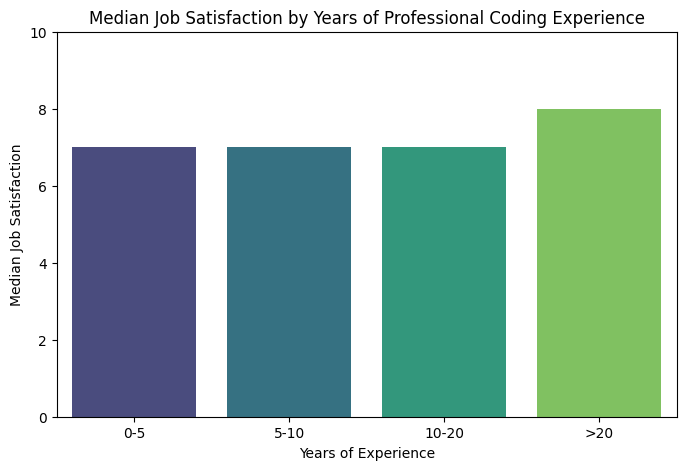

In [22]:
# Visualize with a bar plot

plt.figure(figsize=(8,5))
sns.barplot(x='ExperienceRange', y='JobSat', data=satisfaction, palette='viridis')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction')
plt.ylim(0, 10)      # Assuming JobSat scale is 0-10, adjust if different
plt.show()

##### Visualize Job Satisfaction

Use a count plot to show the distribution of `JobSat` values.    
This provides insights into the overall satisfaction levels of respondents.

C:\Users\shubh\AppData\Local\Temp\ipykernel_25420\3193278177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=job_sat_values, palette="viridis")


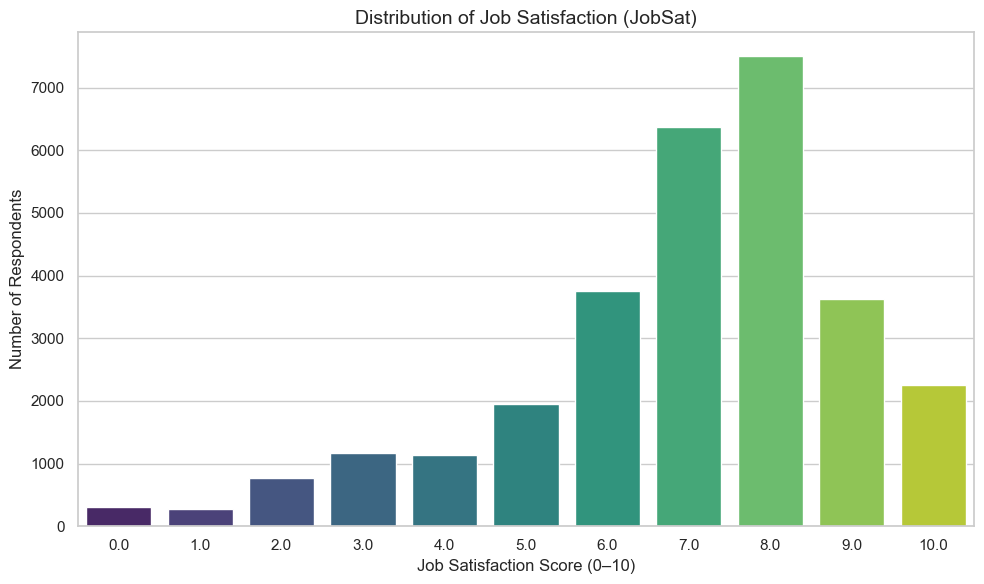

In [23]:
job_sat_values = df['JobSat']

# Set plot style
sns.set(style="whitegrid")

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=job_sat_values, palette="viridis")

# Add labels and title
plt.title("Distribution of Job Satisfaction (JobSat)", fontsize=14)
plt.xlabel("Job Satisfaction Score (0–10)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### Analyzing Remote Work Preferences by Job Role

Analyze trends in remote work based on job roles.     
Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.
- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.

C:\Users\shubh\AppData\Local\Temp\ipykernel_25420\3125351244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette="Set2")


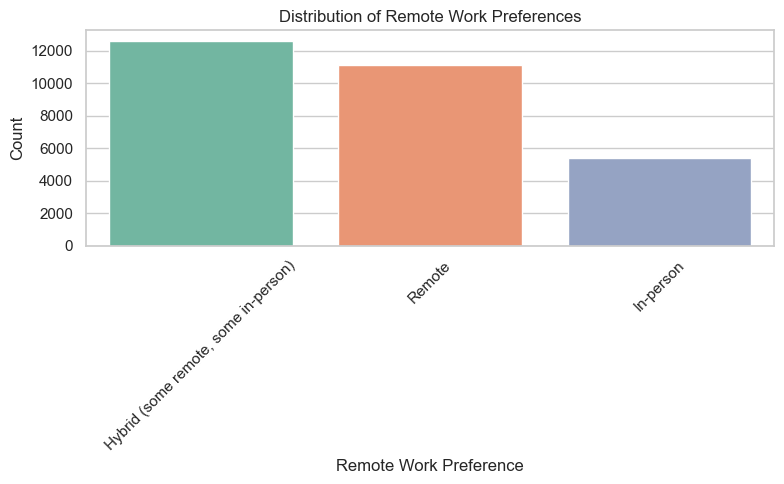

In [24]:
# Count Plot for Remote Work Preferences

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette="Set2")
plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Preference")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Cross-Tabulate Remote Work vs Employment Type

remote_employment_ct = pd.crosstab(df['RemoteWork'], df['Employment'])
print(remote_employment_ct)


Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                10009   
In-person                                            4490   
Remote                                               8038   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       49   
In-person                                                                  18   
Remote                                                                     60   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid (some remote, some in-person)                        

This shows how different employment types (e.g., full-time, part-time) align with remote work options.

C:\Users\shubh\AppData\Local\Temp\ipykernel_25420\42031829.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


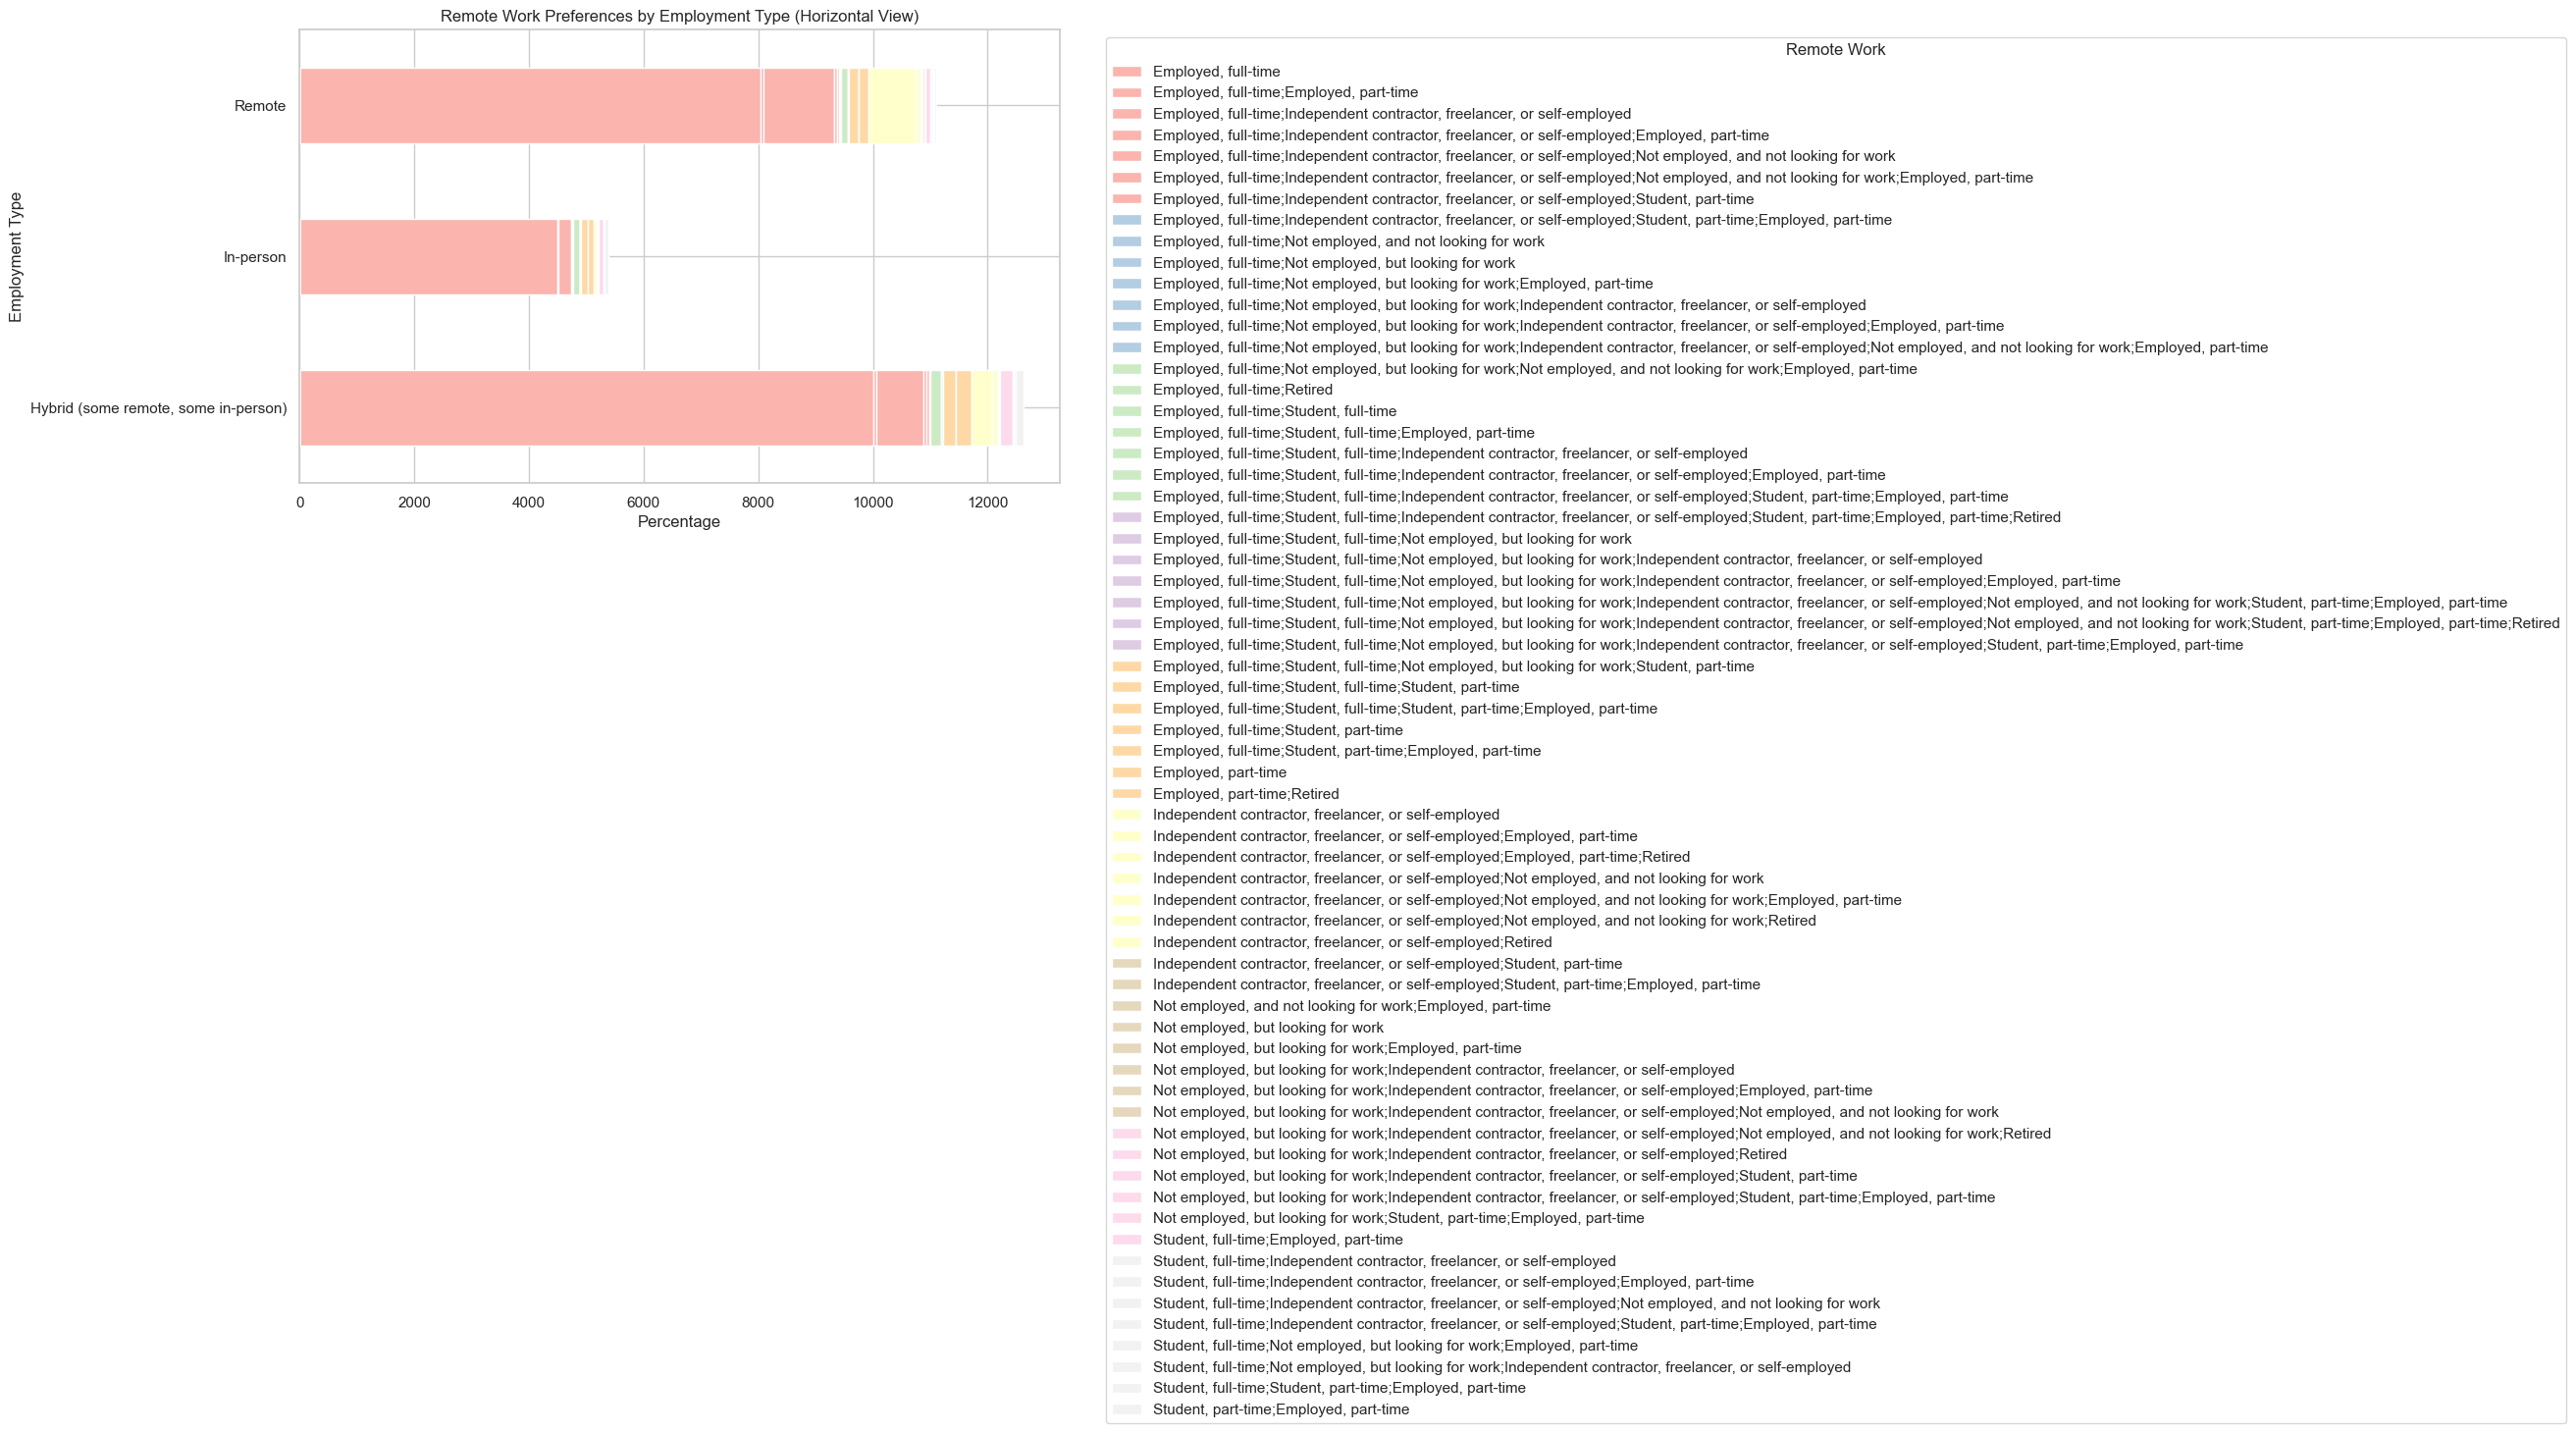

In [26]:
remote_employment_ct.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Remote Work Preferences by Employment Type (Horizontal View)')
plt.xlabel('Percentage')
plt.ylabel('Employment Type')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
# Cross-Tabulate Remote Work vs Job Role

remote_jobrole_ct = pd.crosstab(df['RemoteWork'], df['DevType'])
print(remote_jobrole_ct)

DevType                               Academic researcher  Blockchain  \
RemoteWork                                                              
Hybrid (some remote, some in-person)                  247          14   
In-person                                             132          11   
Remote                                                 43          81   

DevType                               Cloud infrastructure engineer  \
RemoteWork                                                            
Hybrid (some remote, some in-person)                            146   
In-person                                                        31   
Remote                                                          180   

DevType                               Data engineer  Data or business analyst  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)            324                       116   
In-person                          

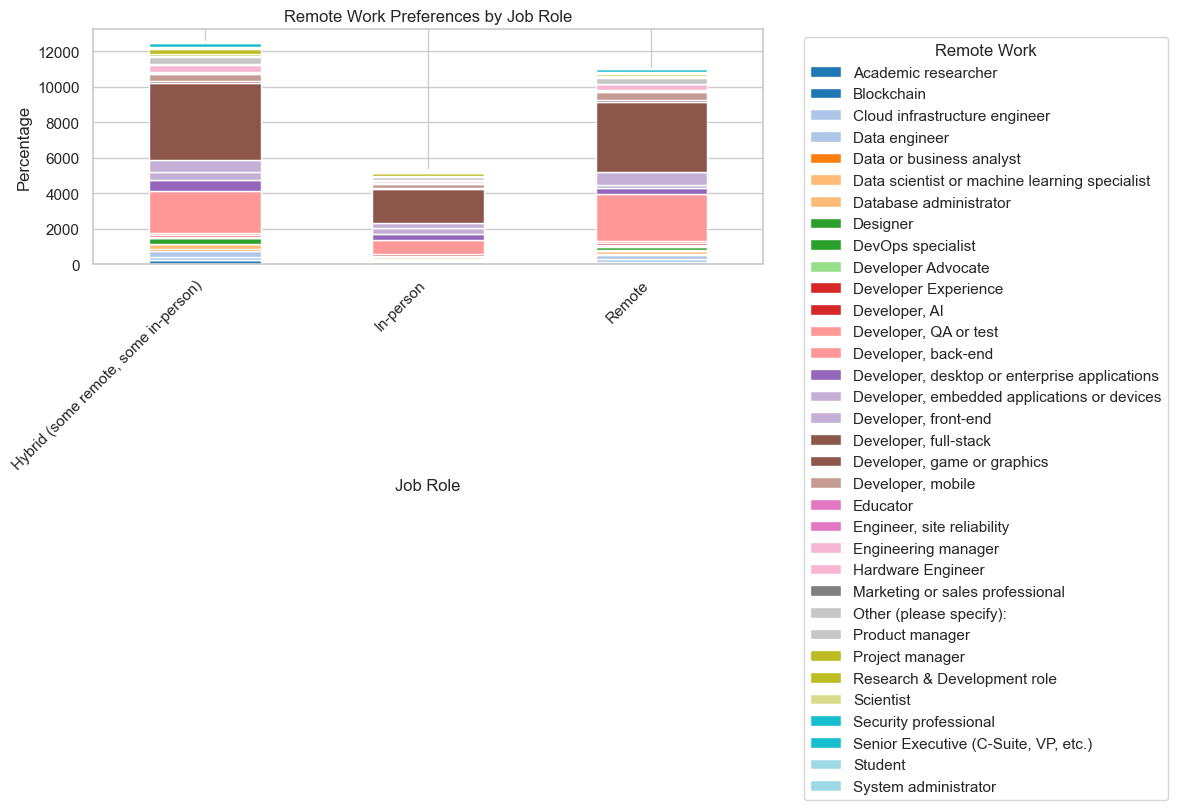

In [28]:
# Plot
remote_jobrole_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

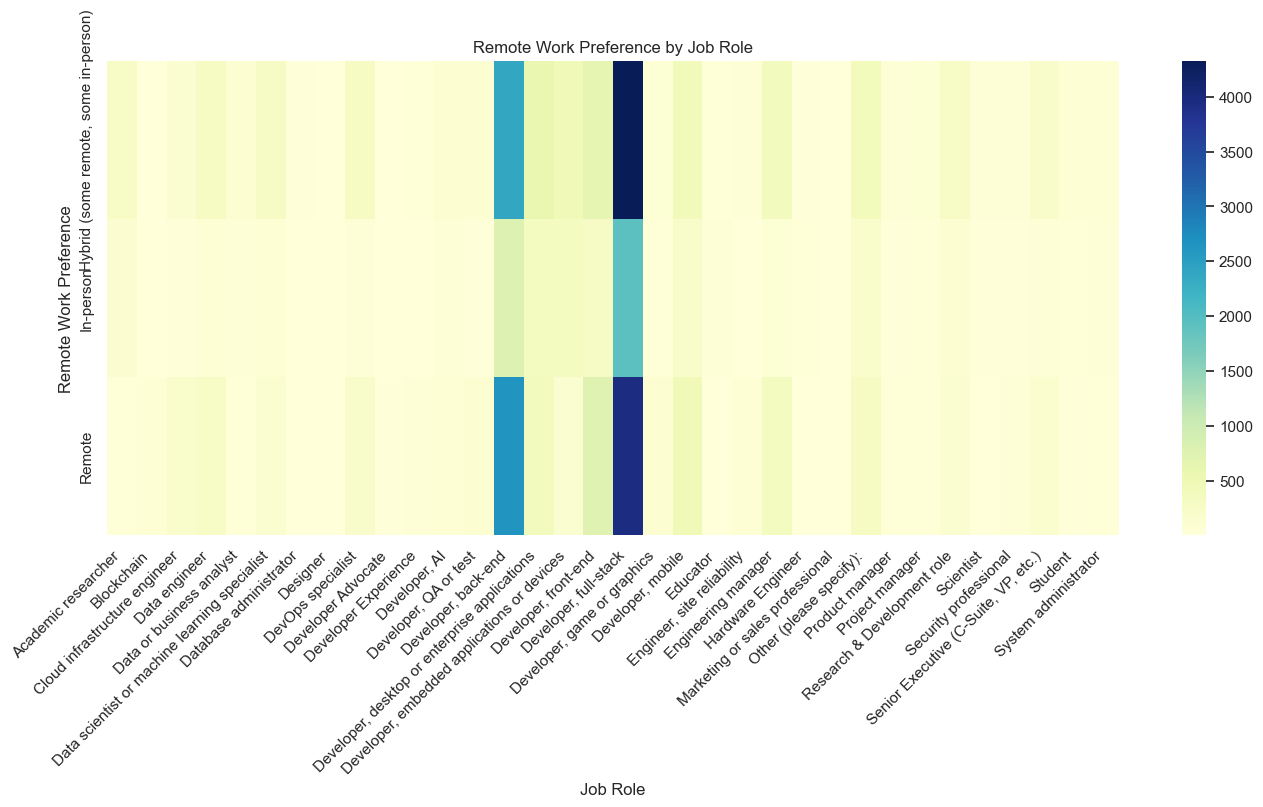

In [29]:
# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(remote_jobrole_ct, annot=False, cmap='YlGnBu')
plt.title('Remote Work Preference by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Remote Work Preference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
# Normalize to Percentages for Better Comparison
remote_by_jobrole_percent = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100
remote_by_jobrole_percent = remote_by_jobrole_percent.round(1)
print(remote_by_jobrole_percent)

RemoteWork                                     Hybrid (some remote, some in-person)  \
DevType                                                                               
Academic researcher                                                            58.5   
Blockchain                                                                     13.2   
Cloud infrastructure engineer                                                  40.9   
Data engineer                                                                  50.1   
Data or business analyst                                                       50.2   
Data scientist or machine learning specialist                                  55.8   
Database administrator                                                         37.9   
Designer                                                                       43.9   
DevOps specialist                                                              52.6   
Developer Advocate                         

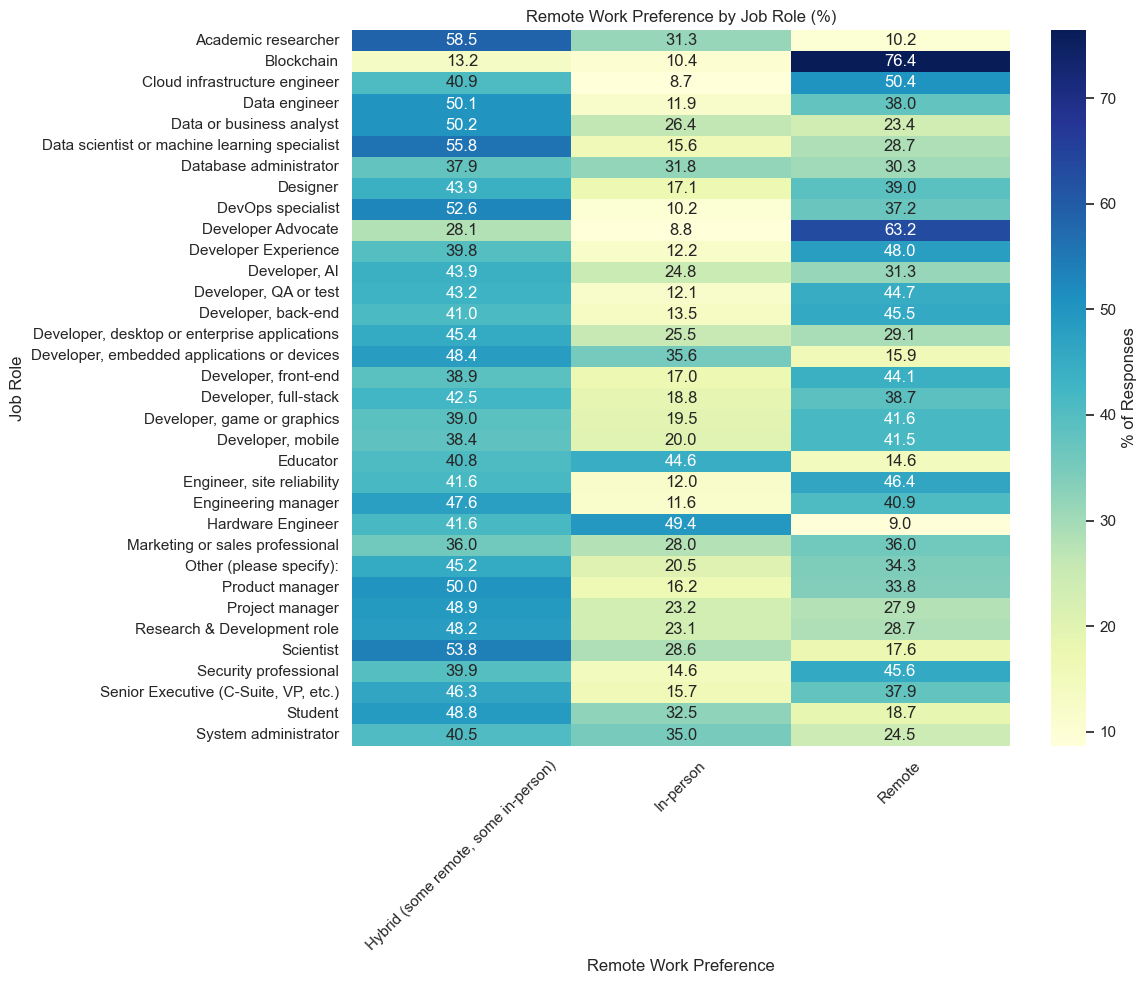

In [31]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(remote_by_jobrole_percent, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': '% of Responses'})
plt.title('Remote Work Preference by Job Role (%)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Job Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

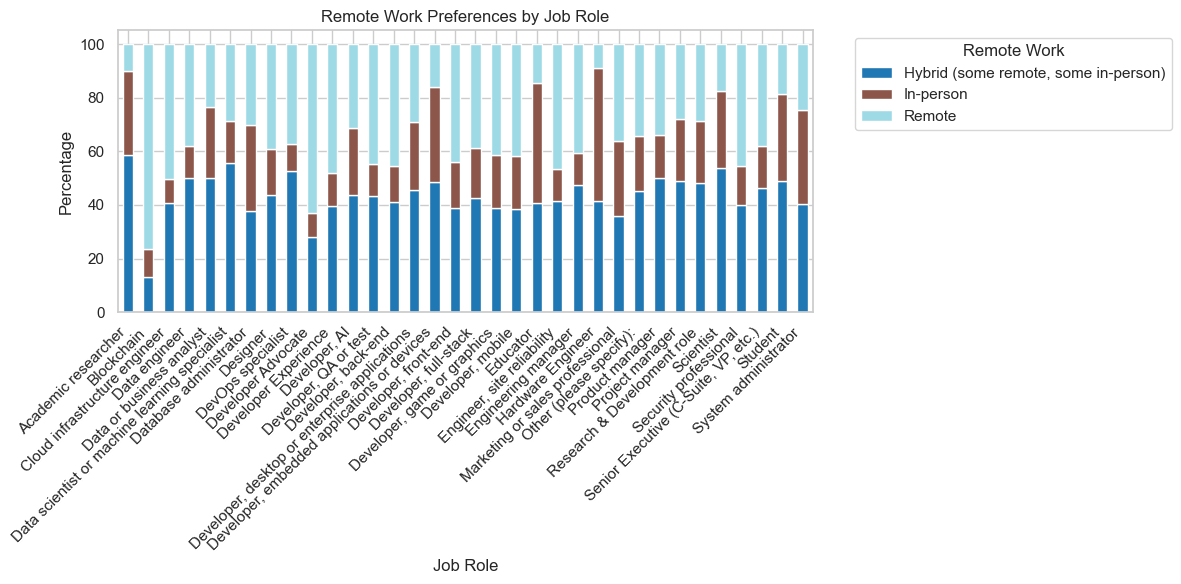

In [32]:
remote_by_jobrole_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Analyzing Programming Language Trends by Region

Analyze the popularity of programming languages by region.    
Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.
- Visualize the top programming languages by region with a bar plot or heatmap.

In [33]:
# Preprocessing

In [34]:
df['LanguageHaveWorkedWith'].isnull().sum()

129

In [35]:
df['LanguageHaveWorkedWith'].isnull().mean()

0.0044290324795715165

In [36]:
df['LanguageHaveWorkedWith'].head()

10                               JavaScript;Python;Ruby
12    Bash/Shell (all shells);C#;JavaScript;PowerShe...
15    C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScri...
18                C#;HTML/CSS;JavaScript;PHP;Python;SQL
20    Bash/Shell (all shells);HTML/CSS;PHP;Python;SQ...
Name: LanguageHaveWorkedWith, dtype: object

In [37]:
df['Country'].isnull().sum()

0

In [38]:
df['Country'].isnull().mean()

0.0

In [39]:
df['Country'].head()

10    United States of America
12    United States of America
15                 Switzerland
18                     Germany
20                     Germany
Name: Country, dtype: object

In [40]:
# Drop rows with missing data
df = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

# Split and explode the LanguageHaveWorkedWith column
df['Language'] = df['LanguageHaveWorkedWith'].str.split(';')
df = df.explode('Language')

In [41]:
# Filter by Top Regions to make the chart readable, focus on the top 5-10 countries.

top_countries = df['Country'].value_counts().nlargest(5).index
df_lang_top = df[df['Country'].isin(top_countries)]

In [42]:
# Create a Heatmap DataFrame
# Generate a pivot table showing language usage per country.


lang_pivot = pd.crosstab(df_lang_top['Country'], df_lang_top['Language'])
lang_pct = lang_pivot.div(lang_pivot.sum(axis=1), axis=0) * 100  # Normalize to percentages

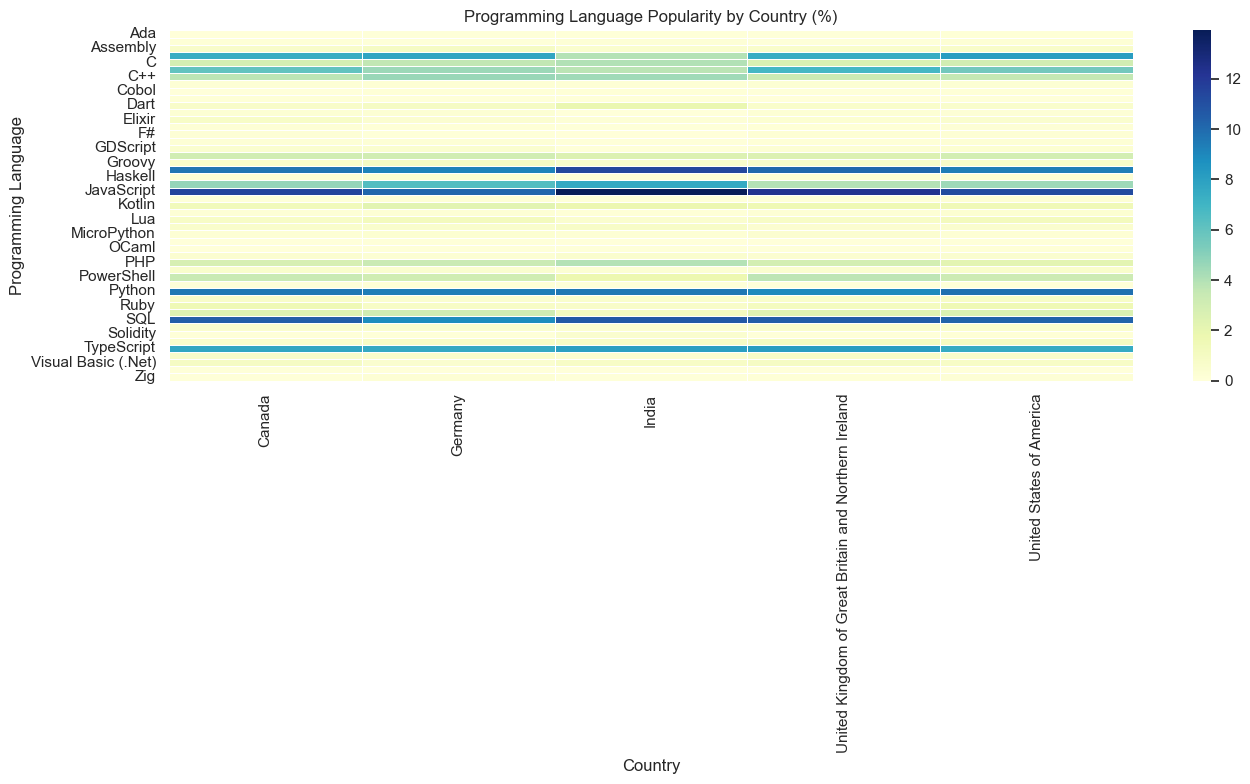

In [43]:
# Plot Heatmap of Language Popularity by Country

plt.figure(figsize=(14, 8))
sns.heatmap(lang_pct.T, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title('Programming Language Popularity by Country (%)')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

This shows language trends across different regions clearly.

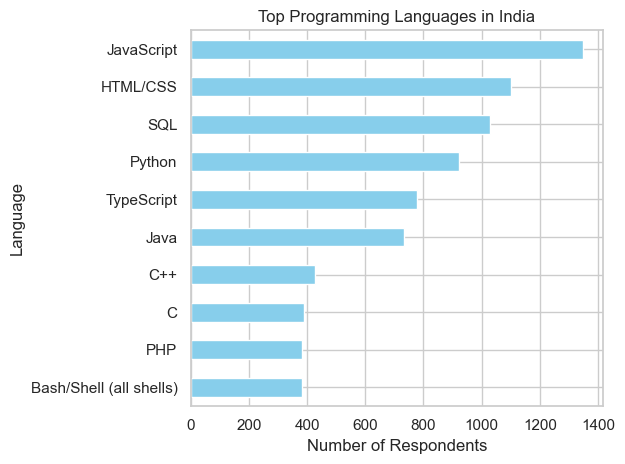

In [44]:
# Top languages for one specific country
country = "India"
top_langs = df[df['Country'] == country]['Language'].value_counts().nlargest(10)

top_langs.plot(kind='barh', color='skyblue')
plt.title(f'Top Programming Languages in {country}')
plt.xlabel('Number of Respondents')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##### Correlation Between Experience and Satisfaction

Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`).    
Use a scatter plot to visualize this relationship.

In [46]:
df['JobSatPoints_1'].isnull().sum()

1261

In [47]:
df['JobSatPoints_1'].sample(10)

2069     20.0
42707    30.0
29441     0.0
55700    25.0
60450     0.0
31421    50.0
42716     0.0
39799     9.0
18368    10.0
58106    15.0
Name: JobSatPoints_1, dtype: float64

In [48]:
df['JobSatPoints_1'].isnull().mean()

0.008027909878594575

In [51]:
# Drop rows with missing values in either column
df['JobSatPoints_1'] = df['JobSatPoints_1'].fillna(df['JobSatPoints_1'].median())

# Ensure values are numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')


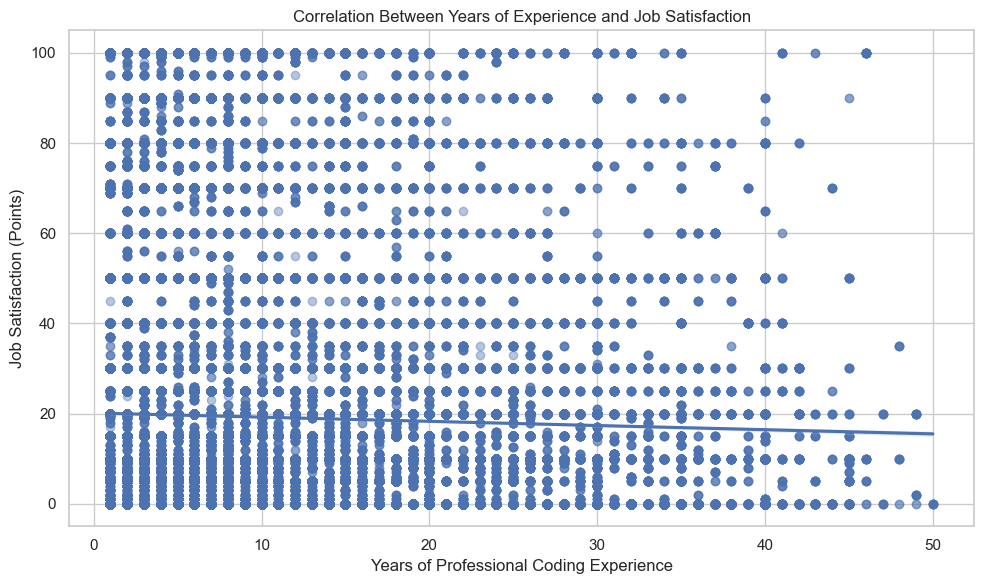

In [52]:
# Scatter Plot with Regression Line

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='YearsCodePro', y='JobSatPoints_1', scatter_kws={'alpha':0.4})
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Compute Correlation Coefficient

corr = df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(f"Pearson Correlation Coefficient: {corr:.2f}")

Pearson Correlation Coefficient: -0.03


--> Very weak negative correlation

Practically no meaningful linear relationship between coding experience and job satisfaction.

##### Educational Background and Employment Type

Explore how educational background (EdLevel) relates to employment type (Employment). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.

In [54]:
# Cross-tabulation
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index') * 100
edu_emp_ct = edu_emp_ct.round(1)
print(edu_emp_ct)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                71.1   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                       77.0   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    77.1   
Primary/elementary school                                          66.5   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     80.7   
Secondary school (e.g. American high school, Ge...                 55.6   
Some college/university study without earning a...                 63.9   
Something else                                                     62.2   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

C:\Users\shubh\AppData\Local\Temp\ipykernel_25420\1811364364.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


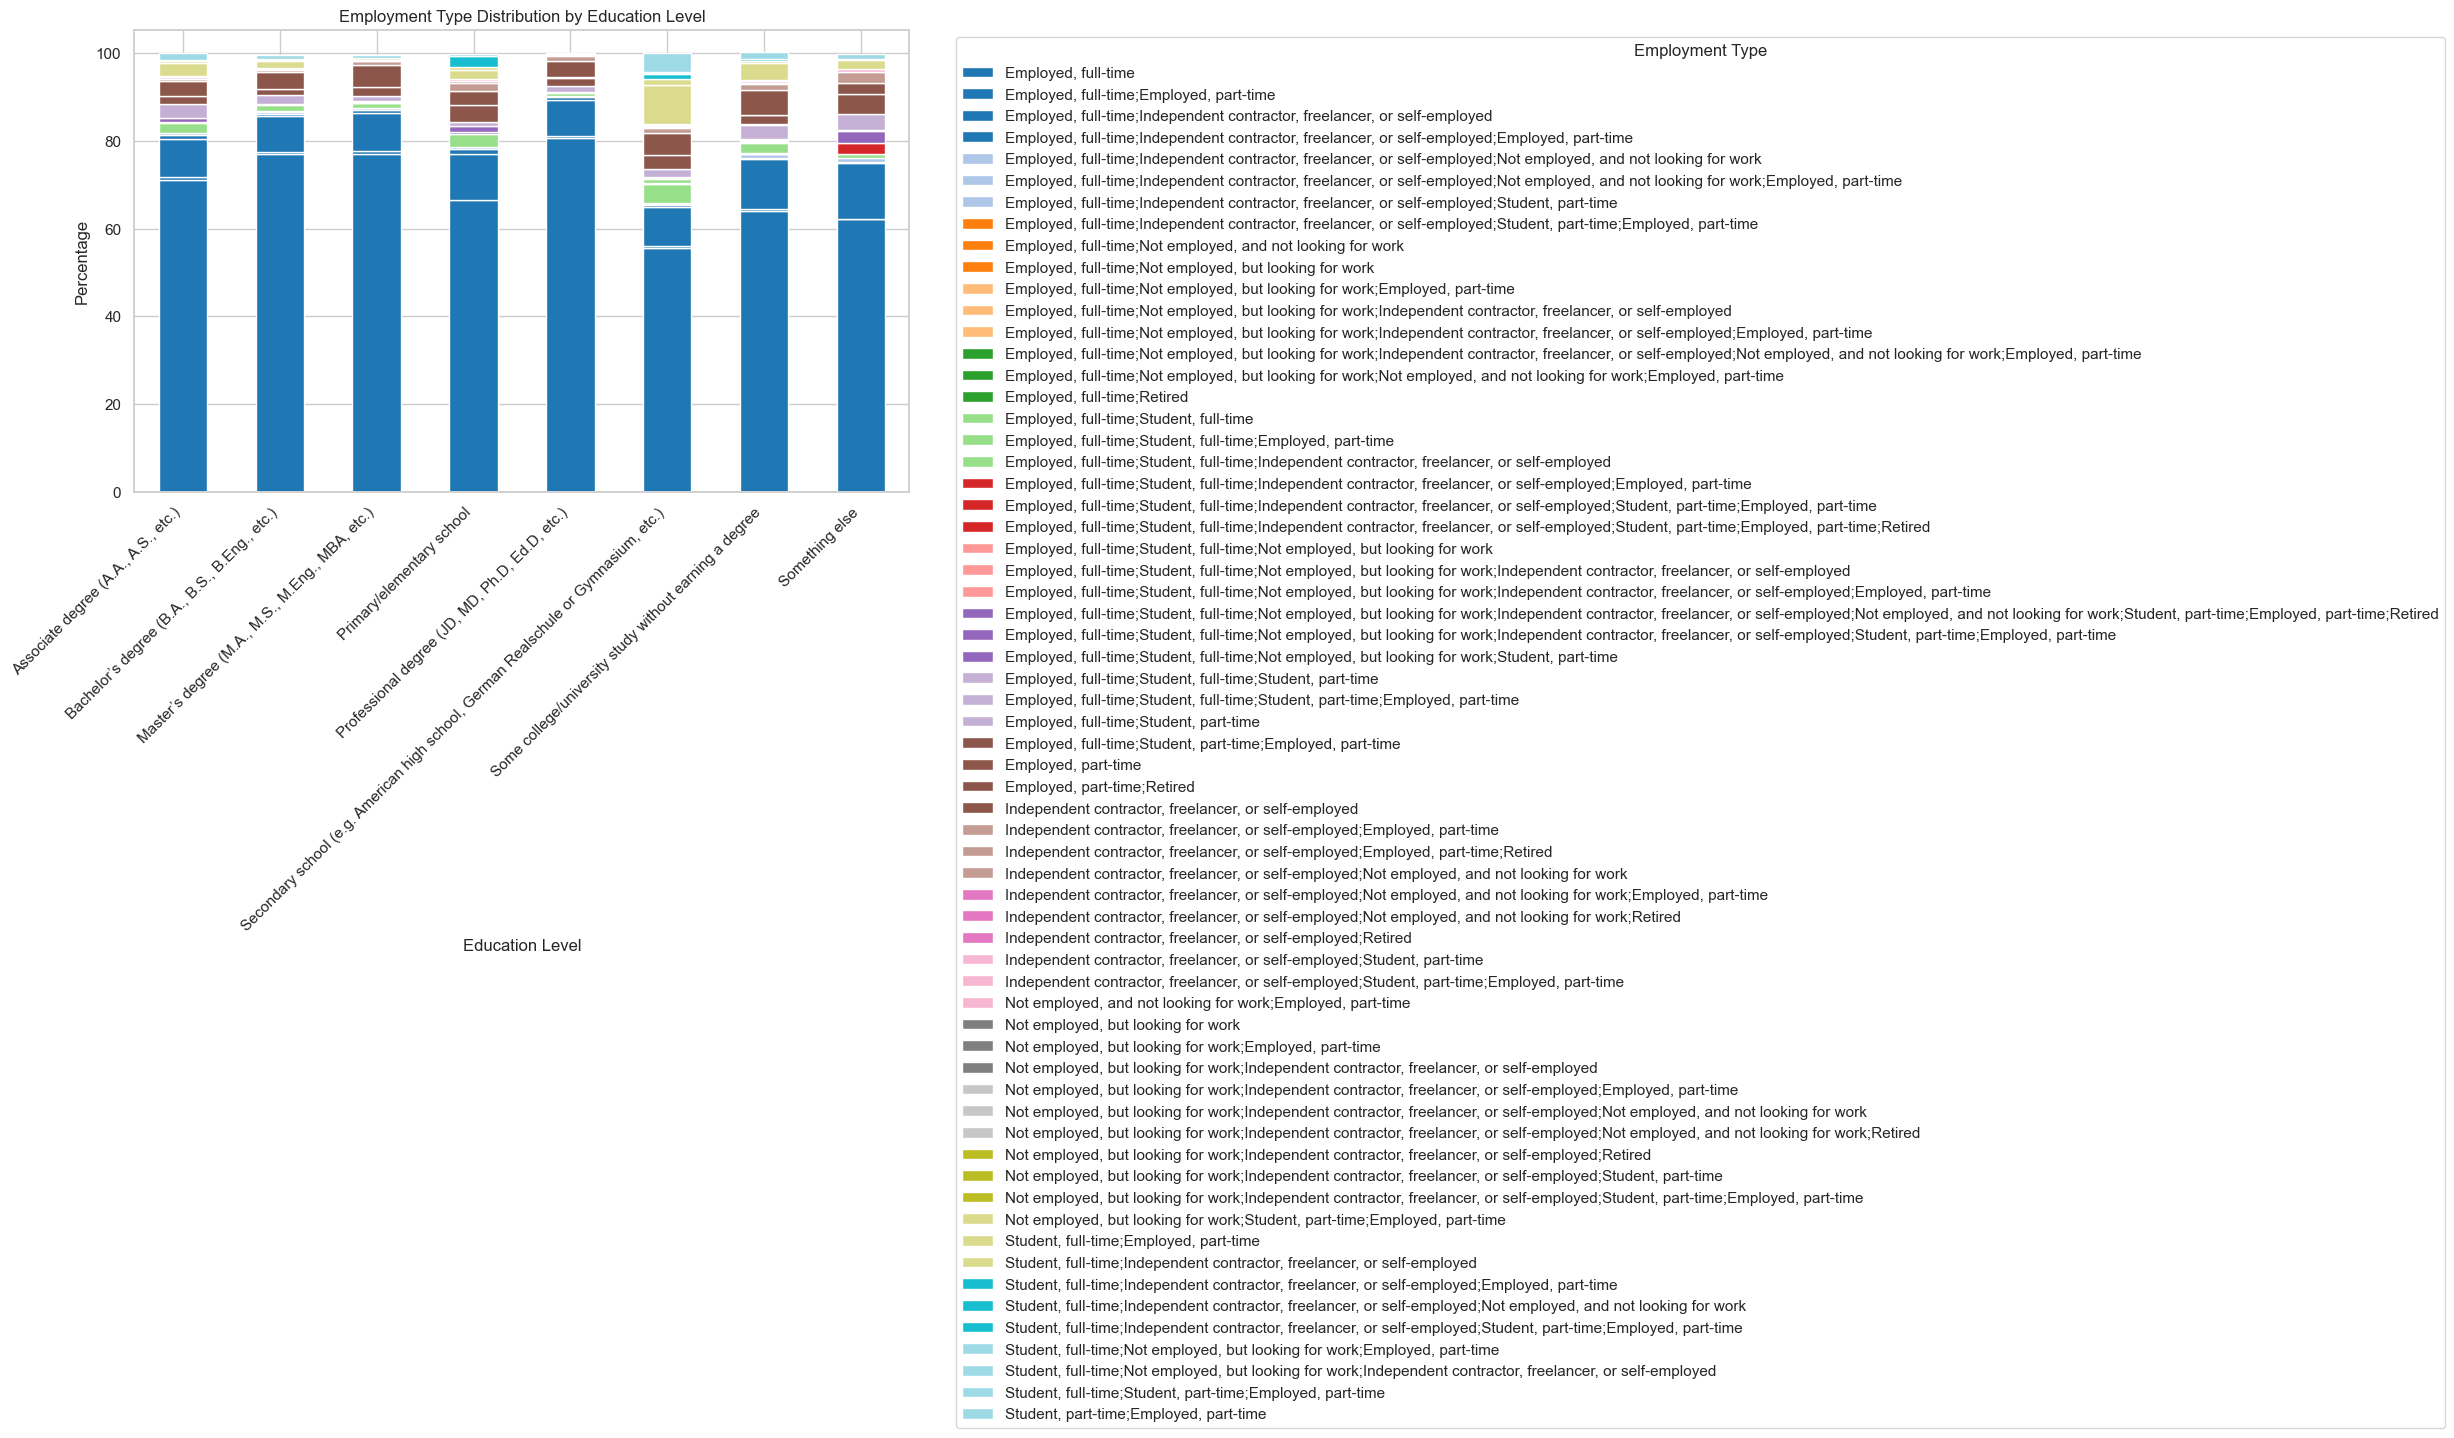

In [55]:
# Visualization (Stacked Bar Plot) 

edu_emp_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.ylabel('Percentage')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Save the Cleaned and Analyzed Dataset

After your analysis, save the modified dataset for further use or sharing.

In [56]:
df.to_csv('./cleaned_survey_data1.csv', index=False)

print("The file is saved")